In [1]:
cd /class/datamine/corporate/farfetch/

/class/datamine/corporate/farfetch


In [2]:
import json
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import Dataset
import os
import time
import numpy as np
from PIL import Image
from torch.utils.data.dataset import Dataset
from tqdm import tqdm
from torchvision import transforms
from torchvision import models

import torch
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import precision_score, recall_score, f1_score
from torch import nn
from torch.utils.data.dataloader import DataLoader
from matplotlib import pyplot as plt
from numpy import printoptions
import requests
import tarfile
import random
import json
from shutil import copyfile

In [3]:
print(torch.cuda.get_device_name(torch.cuda.current_device()))

Tesla V100-PCIE-16GB


In [5]:
file=pd.read_json('meta_all_129927.json')
#can test with small dataset
sfile=pd.read_json('300portion_data.json')

In [6]:
def unique(list1):
    x = np.array(list1)
    return(np.unique(x))
uniq=[]
for i in file['attr']:
    #print(unique(i))
    if unique(i) is not None:
        for j in unique(i):
            uniq.append(j) 
freq=Counter(uniq,reverse=True)
ranking=sorted(freq.items(), key=lambda pair: pair[1], reverse=True)
att_list=[i[0] for i in ranking[1:51]]

In [48]:
word_map_file = "/class/datamine/corporate/farfetch/ECCV_data/WORDMAP.json"
word_map_file = word_map_file
with open(word_map_file, 'r') as f:
    word_map = json.load(f)

In [49]:
word_map['classic']

186

In [50]:
att_dict={}
for i in att_list:
    att_dict[i]=word_map[i]

In [51]:
len(att_dict)

50

In [7]:
import h5py
import h5py
import json
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data_folder = "/class/datamine/corporate/farfetch/ECCV_data"
meta_folder= "/class/datamine/corporate/farfetch/"
split = "VAL"
h = h5py.File(os.path.join(data_folder, split + '_IMAGES' + '.hdf5'), 'r')
imgs = h['images']
total_nr_items = imgs.shape[0]
with open(os.path.join(data_folder, split + '_ATTRS' + '.json'), 'r') as j:
    attrs = json.load(j)
with open(os.path.join(data_folder, split + '_ATTRS_RAW' + '.json'), 'r') as j:
    raw = json.load(j)

In [8]:
os.path.join(data_folder, split + '_IMAGES' + '.hdf5')

'/class/datamine/corporate/farfetch/ECCV_data/VAL_IMAGES.hdf5'

In [8]:
attrs[0]

[129, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 538, 0, 0, 0, 0, 0, 0, 0, 620]

In [9]:
#get top 50 attributes
def unique(list1):
    x = np.array(list1)
    return(np.unique(x))
uniq=[]
for i in file['attr']:
    #print(unique(i))
    if unique(i) is not None:
        for j in unique(i):
            uniq.append(j) 
freq=Counter(uniq,reverse=True)
ranking=sorted(freq.items(), key=lambda pair: pair[1], reverse=True)
att_list=[i[0] for i in ranking[1:51]]
att_dict={}#unique labels dict
ct=0
for i in att_list:
    att_dict[ct]=i
    ct+=1
#keep only top 50 attributes for the dataset
cleaned={} #label dict with top 50 attrs, cleared empty len=18326
empty=[]#item id with empty attrs len=1589
for n in range(len(raw)):
    new=[]
    for i in raw[n]:
        if i in att_list:
            new.append(i)
    if len(new)==0:
        empty.append(n)
    else:
        cleaned[n]=new
#clean imgs shape (18326, 3, 256, 256)
clean_imgs=np.delete(imgs, empty, 0)

In [8]:
att_dict[0]

'cotton'

In [10]:
#get key with value
def get_key(att_dic,value):
    key_list = list(att_dict.keys())
    val_list = list(att_dict.values())
    position = val_list.index(value)
    return(key_list[position])

In [11]:
att_dict

{0: 'cotton',
 1: 'cut',
 2: 'soft',
 3: 'look',
 4: 'style',
 5: 'sleeve',
 6: 'fit',
 7: 'stretch',
 8: 'classic',
 9: 'comfort',
 10: 'print',
 11: 'leather',
 12: 'knit',
 13: 'waist',
 14: 'hem',
 15: 'blend',
 16: 'day',
 17: 'easy',
 18: 'front',
 19: 'stripe',
 20: 'strap',
 21: 'high',
 22: 'lightweight',
 23: 'button',
 24: 'shoulder',
 25: 'neck',
 26: 'leg',
 27: 'logo',
 28: 'slim',
 29: 'heel',
 30: 'color',
 31: 'signature',
 32: 'neckline',
 33: 'denim',
 34: 'wool',
 35: 'modern',
 36: 'cool',
 37: 'one-piece',
 38: 'collar',
 39: 'lace',
 40: 'side',
 41: 'perfect',
 42: 'pocket',
 43: 'silk',
 44: 'cuff',
 45: 'pattern',
 46: 'floral',
 47: 'toe',
 48: 'detail',
 49: 'cozy'}

In [12]:
#encode 0,1 for att labels, col index is att_dict 
def encode(df,att_dic):
    y1 = np.zeros([len(df), len(att_list)])
    y1 = pd.DataFrame(y1)
    for i in range(len(df)):
        for att in df[i]:
            key=get_key(att_dic,att)
            y1.iloc[i,key]=1
    return y1
encode_y=encode(np.array(list(cleaned.values())),att_dict)

<ipython-input-12-5b1bedd886fe>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  encode_y=encode(np.array(list(cleaned.values())),att_dict)


In [13]:
encode_y.shape
encode_y

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
np.where(np.array(encode_y)[0,:] == 1)[0]

array([ 8, 36])

In [15]:
get_key(att_dict,'classic')

8

In [16]:
#split to train/test
X_train,X_test,Y_train,Y_test = train_test_split(clean_imgs,encode_y,test_size = 0.2)
X_train, X_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [16]:
X_train[:2000].shape

(2000, 3, 256, 256)

In [65]:
X_test[:300].shape

(300, 3, 256, 256)

In [66]:
X_val.shape

(3665, 3, 256, 256)

In [17]:
class ECCV_Dataset(Dataset):
    def __init__(self, imgs, attrs, transforms):
#         with open(anno_path) as fp:
#             json_data = json.load(fp)
#         samples = json_data['samples']
        self.transforms = transforms
        self.classes = att_list

        self.imgs = imgs
        self.annos = attrs
       # self.data_path = data_path
      #  print('loading', anno_path)
#         for sample in samples:
#             self.imgs.append(sample['image_name'])
#             self.annos.append(sample['image_labels'])
#         for item_id in range(len(self.annos)):
#             item = self.annos[item_id]
#             vector = [cls in item for cls in self.classes]
#             self.annos[item_id] = np.array(vector, dtype=float)
    def __getitem__(self, item):
        anno = np.array(self.annos)[item,:]
        img = torch.from_numpy(self.imgs[item])
     #   img_path = os.path.join(self.data_path, self.imgs[item])
#         img = Image.open(img_path)
        if self.transforms is not None:
            img = self.transforms(img)
        return img, anno

    def __len__(self):
        return len(self.imgs)

In [18]:
# Test preprocessing
val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
   # transforms.ToTensor(),
    #transforms.Normalize(mean, std)
])
# print(tuple(np.array(np.array(mean)*255).tolist()))

# Train preprocessing
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(),
#     transforms.RandomAffine(degrees=20, translate=(0.2, 0.2), scale=(0.5, 1.5),
#                             shear=None, resample=False, 
#                             fillcolor=tuple(np.array(np.array(mean)*255).astype(int).tolist())),
 #   transforms.ToTensor(),
    #transforms.Normalize(mean, std)
])

In [23]:
torch.cuda.current_device()

0

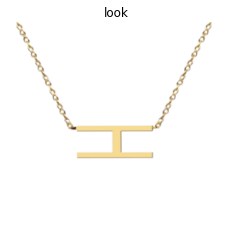

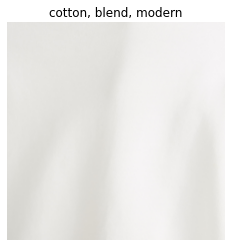

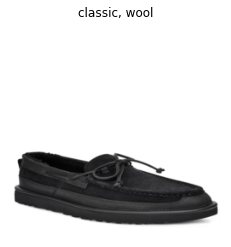

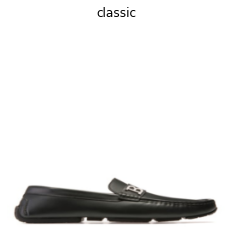

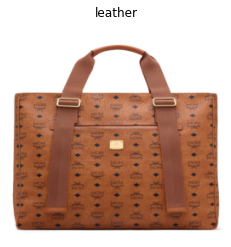

In [19]:
# Initialize the training parameters.
num_workers = 1 # Number of CPU processes for data preprocessing
batch_size = 32
max_epoch_number = 35
learning_rate = 1e-3
save_freq = 1 # Save checkpoint frequency (epochs)
test_freq = 50 # Test model frequency (iterations)

# mean = [0.485, 0.456, 0.406]
# std = [0.229, 0.224, 0.225]

device = torch.device("cpu")
# Save path for checkpoints
save_path = 'checkpoints/'


#visualization function
dataset_train=ECCV_Dataset(X_train,Y_train, train_transform)
dataset_val = ECCV_Dataset(X_test,Y_test, val_transform)
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, num_workers=num_workers, shuffle=True,
                              drop_last=True)
test_dataloader = DataLoader(dataset_val, batch_size=batch_size, num_workers=num_workers)

def show_sample(data):
    # Convert the binary labels back to the text representation. 
    img, binary_img_labels=data
  #  print(binary_img_labels)
    img_labels = np.where(np.array(binary_img_labels)== 1)
    att_labels=[]
    for i in img_labels[0]:
        att_labels.append(att_dict[i])

    y = np.transpose(img, (1, 2, 0)) 
    plt.imshow(y)
    plt.title("{}".format(', '.join(att_labels)))
    plt.axis('off')
    plt.show()

for sample_id in range(5):
    show_sample(dataset_val[sample_id])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]
Label distribution (count, class name): [(61, 'pattern'), (62, 'cool'), (63, 'cuff'), (71, 'detail'), (72, 'side'), (75, 'floral'), (76, 'wool'), (77, 'silk'), (78, 'button'), (80, 'collar'), (82, 'color'), (83, 'cozy'), (85, 'slim'), (87, 'leg'), (88, 'denim'), (91, 'stripe'), (92, 'shoulder'), (93, 'pocket'), (94, 'logo'), (97, 'neck'), (99, 'neckline'), (99, 'lace'), (101, 'front'), (104, 'perfect'), (106, 'one-piece'), (108, 'modern'), (112, 'toe'), (122, 'print'), (122, 'signature'), (125, 'high'), (125, 'lightweight'), (126, 'blend'), (130, 'day'), (132, 'easy'), (141, 'waist'), (143, 'hem'), (146, 'heel'), (154, 'stretch'), (163, 'knit'), (171, 'classic'), (180, 'fit'), (182, 'sleeve'), (183, 'strap'), (192, 'comfort'), (223, 'leather'), (232, 'look'), (244, 'style'), (275, 'soft'), (278, 'cotton'), (315, 'cut')]


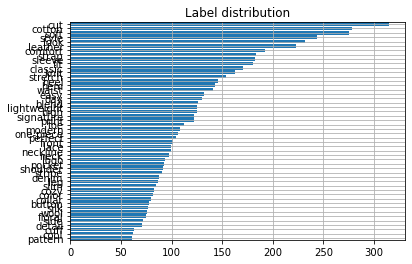

In [76]:
# Calculate label distribution for the entire dataset (train + test)
samples = list(np.array((dataset_train.annos))) + list(np.array((dataset_val.annos)))
samples = np.array(samples)
print(samples)
with printoptions(precision=3, suppress=True):
    class_counts = np.sum(samples, axis=0)
    # Sort labels according to their frequency in the dataset.
    sorted_ids = np.array([i[0] for i in sorted(enumerate(class_counts), key=lambda x: x[1])], dtype=int)
    print('Label distribution (count, class name):', list(zip(class_counts[sorted_ids].astype(int), np.array(dataset_val.classes)[sorted_ids])))
    plt.barh(range(len(dataset_val.classes)), width=class_counts[sorted_ids])
    plt.yticks(range(len(dataset_val.classes)), np.array(dataset_val.classes)[sorted_ids])
    plt.gca().margins(y=0)
    plt.grid()
    plt.title('Label distribution')
    plt.show()

In [36]:
import torch
import torch.nn as nn
import re
# Use the torchvision's implementation of ResNeXt, but add FC layer for a different number of classes (27) and a Sigmoid instead of a default Softmax.
class Resnext50(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        resnet = models.resnext50_32x4d(pretrained=True)
        resnet.fc = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features=resnet.fc.in_features, out_features=n_classes)
        )
        self.base_model = resnet
        self.sigm = nn.Sigmoid()

    def forward(self, x):
        return self.sigm(self.base_model(x))

#model = Resnext50(len(dataset_train.classes))

# Initialize the model
if len(os.listdir(save_path)) ==0:
    model = Resnext50(len(dataset_train.classes))
else:
    
    maxepoch=-1
    maxnum=''
    for i in os.listdir(save_path):
        epochnum=re.findall('[0-9]+', i)
        if int(epochnum[0])>maxepoch:
            maxepoch=int(epochnum[0])
            maxnum=epochnum[0]
    model = Resnext50(len(dataset_train.classes))
    checkpointload = torch.load(save_path+"checkpoint-"+str(maxnum)+".pth")
    model.load_state_dict(checkpointload)
    print('load '+ save_path+"checkpoint-"+str(maxnum)+".pth")

# Switch model to the training mode and move it to GPU.
model.train()
model = model.to(device)

# If more than one GPU is available we can use both to speed up the training.
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

os.makedirs(save_path, exist_ok=True)

# Loss function
criterion = nn.BCELoss()
# Tensoboard logger
# logger = SummaryWriter(logdir)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

load checkpoints/checkpoint-000004.pth


In [26]:
# Use threshold to define predicted labels and invoke sklearn's metrics with different averaging strategies.
def calculate_metrics(pred, target, threshold=0.5):
    pred = np.array(pred > threshold, dtype=float)
    return {'micro/precision': precision_score(y_true=target, y_pred=pred, average='micro'),
            'micro/recall': recall_score(y_true=target, y_pred=pred, average='micro'),
            'micro/f1': f1_score(y_true=target, y_pred=pred, average='micro'),
            'macro/precision': precision_score(y_true=target, y_pred=pred, average='macro'),
            'macro/recall': recall_score(y_true=target, y_pred=pred, average='macro'),
            'macro/f1': f1_score(y_true=target, y_pred=pred, average='macro'),
            'samples/precision': precision_score(y_true=target, y_pred=pred, average='samples'),
            'samples/recall': recall_score(y_true=target, y_pred=pred, average='samples'),
            'samples/f1': f1_score(y_true=target, y_pred=pred, average='samples'),
            }

In [27]:
# Here is an auxiliary function for checkpoint saving.
def checkpoint_save(model, save_path, epoch):
    f = os.path.join(save_path, 'checkpoint-{:02d}.pth'.format(epoch))
    if 'module' in dir(model):
        torch.save(model.module.state_dict(), f)
    else:
        torch.save(model.state_dict(), f)
    print('saved checkpoint:', f)

In [48]:
device = torch.device("cpu")

In [ ]:
#training process
epoch = maxepoch+1
iteration = 0
min_val_loss=999999
saved_loss=[]
val_loss=[]
f = open('training.txt', 'w')
while True:
    batch_losses = []
    for imgs, targets in train_dataloader:
        model.train()
#         print(1)
        imgs, targets = imgs.to(device=device, dtype=torch.float), targets.to(device)

        optimizer.zero_grad()

        model_result = model(imgs)
        loss = criterion(model_result, targets.type(torch.float))

        batch_loss_value = loss.item()
        loss.backward()
        optimizer.step()

        batch_losses.append(batch_loss_value)
        #print('iteration: '+str(iteration)+"loss: "+ str(batch_loss_value))

        print('iteration: '+str(iteration)+"loss: "+ str(batch_loss_value),file=f)

#         with torch.no_grad():
#             model_result = []
#             targets = []
#             for imgs, batch_targets in test_dataloader:
#                 imgs = imgs.to(device=device, dtype=torch.float)
#                 model_batch_result = model(imgs)
#                 model_result.extend(model_batch_result.cpu().numpy())
#                 targets.extend(batch_targets.cpu().numpy())

        if iteration % 200 == 0:
            model.eval()
            trainloss = np.mean(batch_losses)
            test_batch_loss_value=[]
            with torch.no_grad():
                model_result = []
                targets = []
                for imgs, batch_targets in test_dataloader:
                    imgs, batch_targets = imgs.to(device=device, dtype=torch.float), batch_targets.to(device)
                    model_batch_result = model(imgs)
                    loss = criterion(model_batch_result, batch_targets.type(torch.float))
                    test_batch_loss_value = loss.item()
                   # print('iteration: '+str(iteration)+"test loss: "+ str(test_batch_loss_value))

                    print('iteration: '+str(iteration)+"test loss: "+ str(test_batch_loss_value),file=f)

                    model_result.extend(model_batch_result.cpu().numpy())
                    targets.extend(batch_targets.cpu().numpy())
                
            testloss_mean=np.mean(test_batch_loss_value)
            if testloss_mean < trainloss:
                print("save checkpoint at epoch:{:2d} iter:{:3d} train: loss:{:.3f}".format(epoch, iteration, testloss_mean))
                print("save checkpoint at epoch:{:2d} iter:{:3d} train: loss:{:.3f}".format(epoch, iteration, testloss_mean),file=f)
                checkpoint_save(model, save_path, epoch)
            
            result = calculate_metrics(np.array(model_result), np.array(targets))
            print("epoch:{:2d} iter:{:3d} test: "
                  "micro f1: {:.3f} "
                  "macro f1: {:.3f} "
                  "samples f1: {:.3f}".format(epoch, iteration,
                                              result['micro/f1'],
                                              result['macro/f1'],
                                              result['samples/f1']))
            print("epoch:{:2d} iter:{:3d} test: "
                  "micro f1: {:.3f} "
                  "macro f1: {:.3f} "
                  "samples f1: {:.3f}".format(epoch, iteration,
                                              result['micro/f1'],
                                              result['macro/f1'],
                                              result['samples/f1']),file=f)
            model.train()
        iteration += 1
    
    loss_value = np.mean(batch_losses)
    print("epoch:{:2d} iter:{:3d} train: loss:{:.3f}".format(epoch, iteration, loss_value),file=f)

    print("epoch:{:2d} iter:{:3d} train: loss:{:.3f}".format(epoch, iteration, loss_value))
    #testing 
    if loss_value < min_val_loss:
        min_val_loss=loss_value
        epochs_no_improve = 0
    else:
        epochs_no_improve+=1
        if epochs_no_improve==4:
            print('earlystop')
            break
    
#     if epoch % save_freq == 0:
#         checkpoint_save(model, save_path, epoch)
    epoch += 1
    if max_epoch_number < epoch:
        break

save checkpoint at epoch: 5 iter:  0 train: loss:0.184
saved checkpoint: checkpoints/checkpoint-05.pth
epoch: 5 iter:  0 test: micro f1: 0.074 macro f1: 0.037 samples f1: 0.057


In [82]:
cd '/class/datamine/corporate/farfetch/student_work/image_team/checkpoints'

/class/datamine/corporate/farfetch/student_work/image_team/checkpoints


In [50]:
model = Resnext50(len(dataset_train.classes))
checkpointload = torch.load("/class/datamine/corporate/farfetch/student_work/image_team/checkpoints/checkpoint-000000.pth")
model.load_state_dict(checkpointload)

<All keys matched successfully>

[0.11970904 0.15646417 0.1321816  0.12616318 0.11242957 0.09440164
 0.08258902 0.11118916 0.08594592 0.04446016 0.00737563 0.04934569
 0.06713176 0.07760849 0.10130567 0.07000187 0.04006857 0.0979297
 0.04639279 0.03519933 0.02909855 0.10732443 0.05388639 0.04779169
 0.03455958 0.05466988 0.04975126 0.04073579 0.03900729 0.00515995
 0.038335   0.02421935 0.07830448 0.06813559 0.0550758  0.03179793
 0.02583936 0.03019609 0.02362701 0.04324218 0.03022445 0.08444037
 0.07843687 0.01968657 0.03004953 0.0192476  0.02189839 0.00742143
 0.03041469 0.06671362]


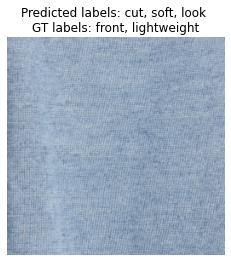

[0.09008431 0.07315931 0.07516716 0.055787   0.08183516 0.10577197
 0.06287973 0.08389366 0.02855133 0.01554873 0.11076327 0.02846514
 0.0440021  0.10347892 0.09802365 0.03446119 0.02191099 0.0336699
 0.03859364 0.02758422 0.10774042 0.05145922 0.01769077 0.04273491
 0.03839248 0.10252366 0.03965387 0.02272515 0.01370041 0.01742553
 0.0330842  0.0253996  0.11421981 0.01404878 0.01499606 0.0140304
 0.0141849  0.02502823 0.01490026 0.08034276 0.07131591 0.05795855
 0.03163786 0.054403   0.02953756 0.0354334  0.1720449  0.01449438
 0.02673899 0.06542104]


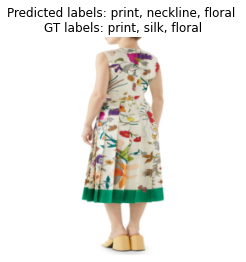

[0.12138713 0.15430577 0.11204526 0.09914794 0.1191627  0.08459781
 0.10823502 0.14453699 0.07569011 0.04495284 0.01634134 0.03829575
 0.06706188 0.1346349  0.12418731 0.0571809  0.04322655 0.08020338
 0.05791188 0.02839394 0.03538476 0.11871018 0.03610582 0.04196169
 0.02969777 0.06238307 0.06627238 0.02584075 0.04321233 0.00913164
 0.0336347  0.02377005 0.0821202  0.06384464 0.05458828 0.02563203
 0.02650194 0.02752072 0.02076422 0.05133936 0.04548248 0.07578693
 0.06679492 0.02519883 0.02933291 0.02094972 0.04126014 0.00950774
 0.03221538 0.0600302 ]


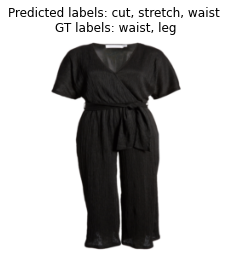

[0.2724733  0.16671541 0.18012719 0.12865977 0.14114895 0.19221485
 0.10113387 0.06064731 0.10979713 0.04264186 0.01239168 0.02695294
 0.08372521 0.03503231 0.09338708 0.10497461 0.0433216  0.07542168
 0.04224696 0.0612353  0.01344194 0.05582486 0.05664539 0.09592026
 0.0555842  0.06442939 0.01216132 0.04389494 0.03361848 0.00246622
 0.0546053  0.02203565 0.05875466 0.02429145 0.08409444 0.03943002
 0.03376173 0.02840228 0.04919145 0.03843419 0.01859227 0.04964246
 0.08058178 0.03124661 0.04614167 0.03043954 0.02352771 0.00385044
 0.04382868 0.08781303]


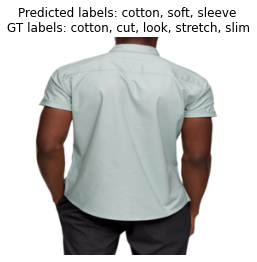

[0.02412757 0.04748108 0.07559727 0.11317524 0.0974079  0.01547278
 0.04452069 0.02096319 0.07254934 0.07337147 0.00506089 0.24102691
 0.02061513 0.00923583 0.01626115 0.00660164 0.07021783 0.0554137
 0.01956701 0.02101822 0.16857062 0.04520905 0.0224044  0.00846402
 0.01349633 0.00880518 0.00623262 0.0575692  0.01750998 0.03694798
 0.01406333 0.05382909 0.00714074 0.00570362 0.02037716 0.0391621
 0.02257579 0.06819626 0.00879923 0.05431433 0.02531079 0.05090448
 0.0351491  0.00434276 0.01332327 0.01527004 0.01436216 0.04307934
 0.02107386 0.02692046]


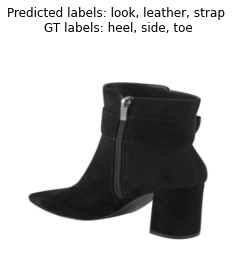

[0.00516513 0.02597285 0.05088415 0.09353711 0.07653296 0.001809
 0.03150371 0.00901158 0.07322956 0.1445339  0.00170118 0.31806085
 0.00780177 0.0028108  0.00348279 0.00095349 0.16339289 0.0526073
 0.00936637 0.01033743 0.3000258  0.03237956 0.00920808 0.00166861
 0.00272302 0.00129379 0.00151843 0.0371696  0.01186227 0.14197516
 0.00462388 0.07784057 0.00074715 0.00122699 0.01669549 0.03577463
 0.01704874 0.10545804 0.00350948 0.04719786 0.02124428 0.03405606
 0.01040632 0.00098745 0.00459744 0.00821042 0.00515956 0.13847363
 0.01321293 0.01383827]


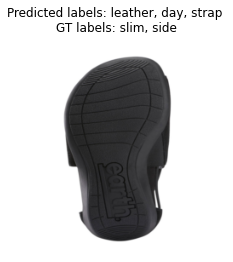

[0.18835293 0.13054706 0.14159445 0.09470983 0.12011953 0.16597667
 0.08294605 0.07039449 0.06583008 0.02634777 0.03153007 0.02450754
 0.0647633  0.04879117 0.10045677 0.07569678 0.03012546 0.05302979
 0.04113999 0.05008222 0.0274694  0.04992617 0.04091929 0.08163431
 0.053619   0.08184583 0.01945891 0.03517875 0.02387906 0.00415989
 0.05060281 0.02360548 0.08377566 0.02185293 0.04275342 0.02789002
 0.02386457 0.02590863 0.03382856 0.04940457 0.02883771 0.05279846
 0.05804903 0.04243928 0.04542347 0.03442716 0.05282948 0.00517939
 0.03664909 0.08515076]


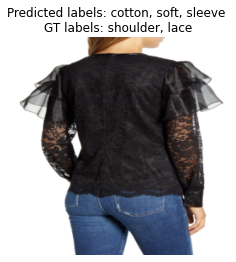

[0.17162587 0.10993053 0.11886717 0.11133171 0.12739658 0.17966181
 0.0706396  0.0488149  0.0807911  0.03643519 0.01302888 0.05015283
 0.07569758 0.041346   0.08838846 0.07181666 0.0352517  0.06940521
 0.03565043 0.04853028 0.03502375 0.06409739 0.04883765 0.06400517
 0.05102244 0.07334563 0.01620635 0.04794801 0.02451821 0.0061748
 0.04113494 0.02315181 0.0715524  0.01928073 0.04747467 0.03068994
 0.0303233  0.03405561 0.03204296 0.0540906  0.02877914 0.05547574
 0.07389206 0.02820705 0.03199678 0.0283964  0.03263933 0.00830757
 0.03929015 0.06726308]


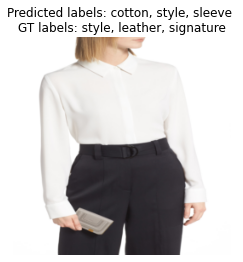

[0.11960346 0.06002644 0.09770615 0.01940476 0.05050701 0.07865601
 0.06527439 0.0755204  0.00888934 0.00307459 0.6129938  0.00157934
 0.019939   0.04630278 0.05378246 0.02638448 0.00747285 0.00709869
 0.02435929 0.02300249 0.02854018 0.00678925 0.00489391 0.07429542
 0.03455495 0.08926941 0.0080095  0.0060352  0.00467372 0.00192418
 0.04018362 0.01414858 0.087388   0.00242668 0.00486597 0.00603615
 0.00380305 0.00635994 0.01260739 0.03890566 0.03034329 0.02307867
 0.00784936 0.1459244  0.04601276 0.0486236  0.41269267 0.00146009
 0.0141626  0.11149878]


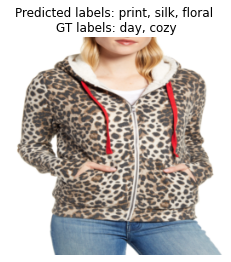

[0.08454908 0.08423383 0.07774941 0.08000135 0.10109369 0.11177388
 0.06045401 0.07352275 0.04759264 0.02950205 0.0264783  0.06680779
 0.05613245 0.0885198  0.10333636 0.04010276 0.03059795 0.05854715
 0.03847221 0.03003619 0.10483596 0.08650201 0.03128398 0.03562746
 0.03638151 0.08397581 0.04467326 0.0354523  0.02025059 0.02080411
 0.0297939  0.02623069 0.0953237  0.023839   0.02496795 0.02065775
 0.02211157 0.03575476 0.0167737  0.07725129 0.06325714 0.06866825
 0.05340749 0.0286105  0.02462686 0.02650046 0.07193044 0.02039818
 0.03146019 0.05226892]


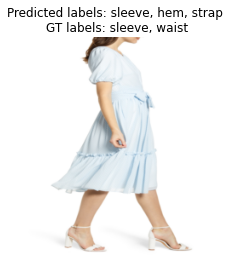

[0.00540983 0.02223034 0.04573374 0.08124065 0.0755422  0.00274289
 0.02576344 0.00756268 0.06000999 0.11522491 0.00258309 0.3142654
 0.00839749 0.0030272  0.00407756 0.00111347 0.13102894 0.04644287
 0.0085647  0.0115007  0.3767335  0.03102418 0.00964992 0.00200453
 0.0033286  0.00197517 0.00156397 0.03874224 0.0089812  0.17711811
 0.00495252 0.07277842 0.00109381 0.00095595 0.01316286 0.03218776
 0.01582805 0.10802703 0.00374824 0.05691537 0.02629931 0.03243706
 0.0099456  0.00135934 0.00484672 0.00993026 0.00782366 0.16322856
 0.01435698 0.01494031]


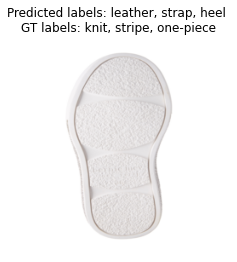

[0.00381167 0.02053222 0.04704015 0.06813957 0.0898429  0.00212929
 0.02265179 0.00578025 0.05552762 0.12685268 0.00206434 0.34339622
 0.00713334 0.00233102 0.00328686 0.00098129 0.1165475  0.04003476
 0.00685288 0.00984233 0.4611723  0.03779957 0.01044133 0.00162798
 0.00241594 0.00158015 0.00139119 0.03395115 0.00756781 0.25567678
 0.00441964 0.06743467 0.00082378 0.00079571 0.01169961 0.03863395
 0.01422692 0.11924507 0.00344169 0.05568584 0.02593301 0.02394589
 0.00863585 0.00102305 0.00462204 0.00949106 0.00655906 0.21156566
 0.01382355 0.01341616]


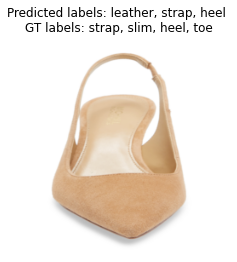

[0.03941482 0.07832826 0.08873628 0.08009079 0.13696846 0.0420359
 0.05389037 0.04673567 0.06030592 0.06563846 0.01140315 0.13379316
 0.04035737 0.04043926 0.05063821 0.02327241 0.04482009 0.06157516
 0.02764354 0.02600743 0.18407829 0.11684214 0.037848   0.01903714
 0.01734806 0.03283484 0.02804162 0.03858728 0.02150141 0.06177628
 0.02288623 0.03699199 0.03184938 0.0174775  0.02848068 0.03828494
 0.02413076 0.06369559 0.01499684 0.07218168 0.05597844 0.05080167
 0.04276715 0.01208047 0.02163634 0.02305866 0.03368501 0.0507433
 0.03104771 0.04202686]


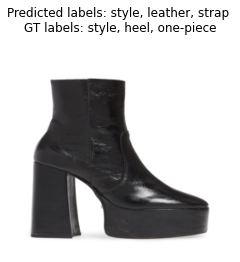

[0.10880861 0.07093958 0.08474996 0.03216471 0.06453548 0.10018058
 0.0662558  0.09220057 0.0161869  0.00698854 0.34103593 0.00616177
 0.03249355 0.08879109 0.08449928 0.03321507 0.01337814 0.01682146
 0.03294228 0.02671227 0.05888919 0.02084615 0.00963482 0.06175
 0.03745141 0.11484375 0.02246425 0.01129719 0.00855431 0.00685657
 0.03780216 0.01968082 0.12100518 0.00682925 0.00921757 0.00871287
 0.00763437 0.01319723 0.01438283 0.06105714 0.05558863 0.04033674
 0.0155428  0.10650632 0.03789298 0.04404028 0.30837348 0.0051141
 0.02111638 0.09288814]


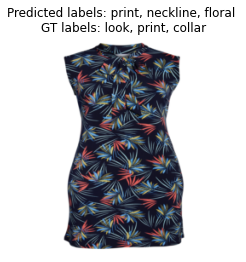

[0.07362082 0.0833101  0.07833856 0.07970295 0.10163232 0.09152065
 0.06195281 0.07700112 0.04551942 0.0305513  0.02990078 0.07394207
 0.05070134 0.08879562 0.09568138 0.03517125 0.03114518 0.05472692
 0.03904437 0.02783554 0.12521704 0.0915844  0.02984098 0.03164811
 0.03366996 0.0755161  0.04898463 0.03525248 0.02037377 0.0254134
 0.02937726 0.02913743 0.08739873 0.02442616 0.02302548 0.02203701
 0.02131093 0.03761265 0.01544251 0.07928762 0.06663594 0.0684101
 0.05110956 0.02715458 0.02555265 0.02685985 0.07626221 0.02360226
 0.03000773 0.05092755]


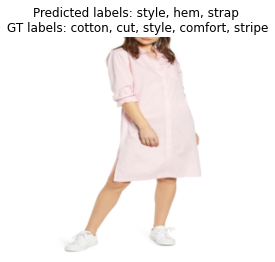

[0.09092914 0.09104198 0.08110432 0.08307159 0.10078026 0.11244182
 0.06623425 0.08883221 0.04785994 0.02889937 0.03415082 0.05973971
 0.05875116 0.10941478 0.1110968  0.04346871 0.0327892  0.06152199
 0.04322399 0.03137346 0.10261025 0.08973059 0.03073027 0.03978752
 0.03940488 0.09346212 0.05394831 0.03459856 0.02210015 0.02107825
 0.03275254 0.02830771 0.10977235 0.02763485 0.02653136 0.02070082
 0.02236792 0.03524407 0.01781762 0.08048645 0.06994659 0.07586012
 0.05331365 0.03475584 0.02711606 0.0287414  0.08537146 0.02023645
 0.03261244 0.0580084 ]


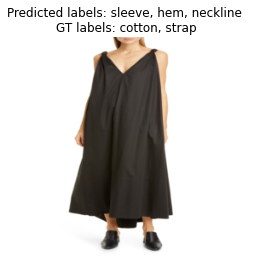

[0.08784096 0.13552566 0.09537098 0.10081574 0.11482795 0.07037427
 0.09756273 0.14753477 0.07158744 0.05158659 0.01470721 0.06857239
 0.06356934 0.15654013 0.1234264  0.04571091 0.04749166 0.08977757
 0.05831027 0.02483977 0.06667055 0.15045418 0.0360161  0.03091934
 0.02765518 0.06249332 0.0942286  0.03058157 0.04292994 0.0184848
 0.02936895 0.02794598 0.08453372 0.07020378 0.0465044  0.02617663
 0.02755976 0.03486532 0.01679668 0.06338616 0.06306848 0.08886342
 0.07068551 0.02085775 0.02512101 0.02002915 0.04546765 0.01863649
 0.03224508 0.05108041]


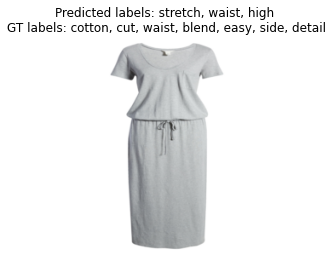

[0.24395548 0.22686328 0.19636418 0.14744367 0.15448536 0.12714626
 0.13872667 0.11142544 0.14216553 0.06863736 0.00699555 0.0330215
 0.09245119 0.0628177  0.11042704 0.10895153 0.05883223 0.10974243
 0.05713456 0.04945203 0.01147749 0.09972503 0.06439538 0.07691275
 0.04175706 0.05069009 0.0283954  0.03982161 0.06128901 0.00285659
 0.05221333 0.02359332 0.05645018 0.06609996 0.12329948 0.04695178
 0.03963803 0.02992012 0.04484331 0.03463099 0.02096024 0.06592251
 0.10059787 0.02229365 0.0432328  0.02328961 0.01629573 0.0044103
 0.04367046 0.08145048]


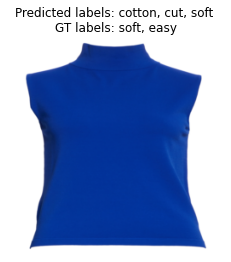

[0.08853263 0.2496868  0.13927871 0.11168926 0.12442093 0.0231241
 0.18230808 0.28491408 0.11027317 0.07388733 0.00395481 0.02744571
 0.04563904 0.17580268 0.10563312 0.04039158 0.05029652 0.0869855
 0.09069739 0.01161348 0.01003098 0.18660517 0.03011212 0.01984686
 0.01153833 0.01785621 0.11838033 0.01309507 0.09689114 0.00263607
 0.02053921 0.01558823 0.03300707 0.20685607 0.08084255 0.02775673
 0.02144705 0.01374665 0.01080326 0.02244813 0.02110077 0.06794278
 0.08350433 0.00724192 0.02252493 0.00836187 0.01122365 0.00327509
 0.01865194 0.03820372]


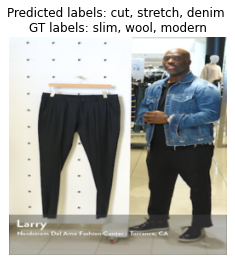

[0.23448995 0.13482212 0.1598337  0.12821516 0.140791   0.20534472
 0.08145703 0.04397345 0.10354865 0.04167587 0.0107786  0.04079273
 0.08020391 0.02675933 0.08405742 0.09259717 0.04047358 0.07374784
 0.03742871 0.06264389 0.01954684 0.05113918 0.06018551 0.08683977
 0.05971546 0.06566069 0.01018645 0.05500295 0.02801293 0.00313515
 0.05045159 0.02302147 0.05648173 0.01801249 0.0673743  0.04037781
 0.03419548 0.03270871 0.04565718 0.04347211 0.01914239 0.05015839
 0.08519391 0.02820849 0.04155689 0.03136184 0.0234932  0.00517588
 0.04426837 0.0802152 ]


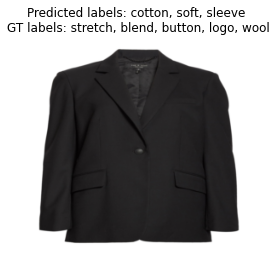

[0.01364077 0.02244702 0.04884078 0.08464097 0.04756094 0.00532441
 0.03579608 0.01183047 0.04305417 0.04150269 0.01656878 0.14062105
 0.00837229 0.0037495  0.00547951 0.00139946 0.08474256 0.02723208
 0.01288584 0.01530089 0.1962795  0.00985687 0.00538289 0.00419031
 0.00876377 0.00362576 0.00131868 0.03826086 0.0078434  0.03285241
 0.00802106 0.07178663 0.00226464 0.00080517 0.00826221 0.0181821
 0.01230882 0.0511761  0.00422538 0.05221531 0.02048912 0.04124342
 0.01055109 0.0041701  0.0082911  0.01526715 0.02480706 0.03845894
 0.01212047 0.02225822]


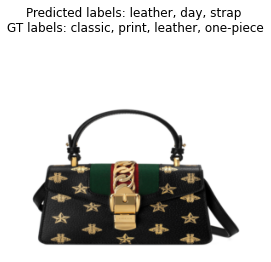

[0.08683599 0.1879518  0.10800748 0.09292217 0.11160658 0.04130651
 0.13502146 0.23088063 0.07907073 0.05363591 0.01032641 0.03293227
 0.05240934 0.19966246 0.1257178  0.04181578 0.04487263 0.07988197
 0.07518686 0.01582813 0.02602311 0.16503626 0.02838665 0.02490608
 0.01672629 0.03754586 0.11842445 0.01628375 0.06178828 0.00719896
 0.023538   0.0195171  0.06076922 0.12235372 0.05653096 0.02238635
 0.02180279 0.01955537 0.01234379 0.03865535 0.04101705 0.07557758
 0.067068   0.01449488 0.02343495 0.01304028 0.02845147 0.00742013
 0.02341437 0.04469983]


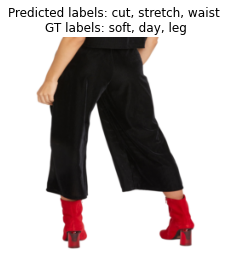

[0.12174945 0.12317743 0.12170669 0.0901448  0.11100662 0.11035809
 0.08092478 0.09634636 0.05653729 0.02706761 0.03002963 0.03514059
 0.05555034 0.07303466 0.10355667 0.05600655 0.02960018 0.05612233
 0.04517968 0.0365259  0.04460336 0.06834275 0.03677905 0.05544578
 0.04301522 0.07516543 0.03954049 0.03263747 0.02581633 0.00670087
 0.04227183 0.02546714 0.0909035  0.03420545 0.0327978  0.02536998
 0.02104544 0.02672997 0.02272346 0.05442182 0.0391233  0.06588222
 0.05739971 0.03456514 0.03853581 0.02902388 0.0592925  0.00766467
 0.03099538 0.07180752]


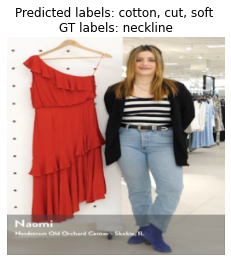

[0.00979436 0.02251625 0.04481299 0.12384161 0.0562184  0.00432101
 0.03176834 0.00907957 0.07053235 0.08735082 0.00251285 0.37650663
 0.0097155  0.00286184 0.0047821  0.00125009 0.12720576 0.05046983
 0.01223681 0.0139118  0.22626401 0.01836411 0.0088601  0.00252101
 0.0070374  0.00228799 0.00145065 0.0655129  0.01152894 0.04793338
 0.00582267 0.07592031 0.00142795 0.00125137 0.01254269 0.02707682
 0.01910461 0.07901377 0.00381941 0.04998021 0.01793558 0.05056158
 0.0185483  0.00151359 0.00539745 0.0095565  0.00762538 0.06910517
 0.0132662  0.0144786 ]


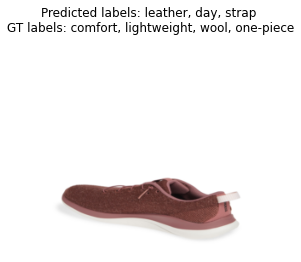

[0.11075174 0.12858345 0.11566748 0.10754619 0.12162656 0.09596074
 0.08149786 0.08888541 0.07576165 0.04054177 0.00969149 0.05833797
 0.06045109 0.06762148 0.09664705 0.05349815 0.03569498 0.07602735
 0.04441029 0.03118023 0.03798621 0.0941706  0.04436881 0.04108549
 0.03485587 0.05507055 0.04107452 0.03807968 0.03359773 0.00666261
 0.0338636  0.02314262 0.06902909 0.04584345 0.04305483 0.02944879
 0.0256968  0.03006313 0.02051806 0.04785794 0.03247634 0.06970271
 0.07650539 0.01881239 0.02833958 0.02015348 0.02851922 0.00841051
 0.03106146 0.0552426 ]


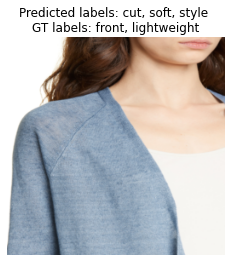

[0.00447139 0.01950379 0.04486332 0.09427926 0.06961498 0.00188096
 0.02501959 0.00584204 0.06814483 0.14263974 0.00180115 0.40088084
 0.00721487 0.00175919 0.00271679 0.00075652 0.163038   0.04669136
 0.00800766 0.01154716 0.38047105 0.02467591 0.00886217 0.00148027
 0.00294813 0.00118529 0.00094492 0.04843201 0.00926834 0.1715986
 0.00420889 0.08887852 0.0006097  0.0006883  0.01293475 0.03566021
 0.01721897 0.12433043 0.00335089 0.05266948 0.02092039 0.03319511
 0.00977983 0.00092604 0.00430281 0.00911467 0.00537634 0.17583837
 0.01309896 0.0130508 ]


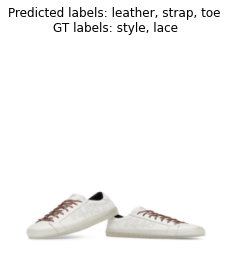

[0.06401259 0.25312752 0.11464573 0.10498253 0.11110151 0.01427696
 0.18966731 0.32993603 0.11241187 0.08112618 0.00217811 0.02491476
 0.04009973 0.2276174  0.10011367 0.02946933 0.05187781 0.0852174
 0.10193836 0.00709695 0.00783449 0.2302989  0.02268049 0.01210914
 0.00661248 0.01208849 0.14333221 0.00895414 0.11070641 0.0024466
 0.0128764  0.01194626 0.02412557 0.24938408 0.08269926 0.02175109
 0.01886516 0.01064909 0.00662578 0.01824982 0.01952231 0.06373768
 0.07948624 0.00449967 0.01482624 0.00521978 0.00727935 0.00295959
 0.01424481 0.02656357]


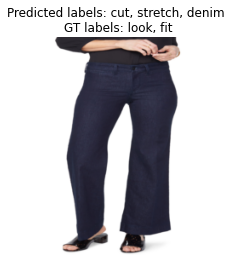

[0.10878133 0.10417276 0.09790951 0.09637447 0.11238302 0.12557073
 0.06775075 0.07556035 0.06081356 0.03216967 0.01783022 0.05966295
 0.06266747 0.07453167 0.10442248 0.05191647 0.03331058 0.06765094
 0.04098501 0.03508532 0.06279037 0.08398177 0.04010541 0.04546981
 0.04192717 0.08005087 0.03871857 0.03991204 0.02490636 0.01126124
 0.03476428 0.02520656 0.09190322 0.02989959 0.03360876 0.02496472
 0.02506365 0.03382996 0.02107174 0.06435118 0.04587259 0.07026244
 0.0654368  0.02770178 0.02837303 0.02557243 0.04938243 0.01277311
 0.03375586 0.05916708]


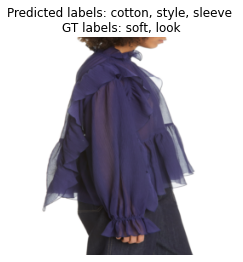

[0.22706679 0.13129033 0.15793613 0.12260126 0.13701342 0.1932991
 0.07901397 0.04153055 0.09823764 0.04019315 0.01125273 0.03745622
 0.07476155 0.02501046 0.07866184 0.08713093 0.03923628 0.06789906
 0.03506253 0.06020906 0.0196185  0.04912563 0.05626666 0.08302587
 0.05445203 0.06128892 0.00901701 0.05085909 0.02587131 0.00323528
 0.04809109 0.02269394 0.05196232 0.01588114 0.06477104 0.03879192
 0.03223398 0.03212229 0.04403806 0.04198673 0.01855648 0.04605649
 0.07649592 0.02754127 0.04042098 0.03054354 0.02329097 0.00508862
 0.0420545  0.07854654]


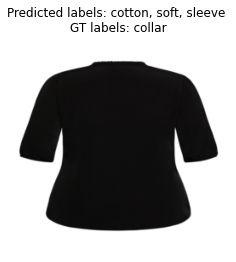

[0.1306366  0.11047739 0.12220883 0.12123428 0.12481125 0.11638243
 0.07276526 0.05771211 0.07632404 0.03476698 0.00905783 0.06145372
 0.05935286 0.0401414  0.07593751 0.05390122 0.03250542 0.06631979
 0.03737156 0.03465476 0.03379809 0.07223749 0.04455465 0.04635255
 0.04311243 0.05064896 0.02097094 0.04627229 0.02608953 0.004725
 0.03603191 0.02187004 0.05907349 0.02732337 0.03936986 0.03159366
 0.02633508 0.02962375 0.0229309  0.04482517 0.02398087 0.05829047
 0.07952709 0.01832743 0.02948856 0.02114652 0.02457234 0.00672126
 0.03037281 0.05523242]


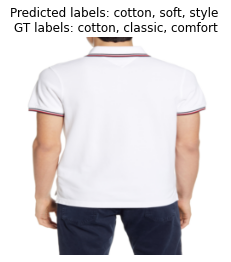

[0.08568227 0.19895679 0.10952928 0.10002152 0.11524814 0.0391572
 0.13983785 0.23994377 0.08983389 0.06352226 0.00714846 0.03631636
 0.05663747 0.20779149 0.12723957 0.04332517 0.0504532  0.09268001
 0.07895503 0.01549196 0.02324777 0.18619144 0.0307712  0.02353063
 0.01546593 0.0347877  0.12565382 0.01678612 0.07074197 0.00714247
 0.02230364 0.01905587 0.05625139 0.14192493 0.06677682 0.02377423
 0.02379248 0.02020822 0.01243726 0.03688671 0.03980171 0.07996552
 0.07404041 0.01240899 0.02157641 0.01179633 0.02223172 0.00767203
 0.02400735 0.04262927]


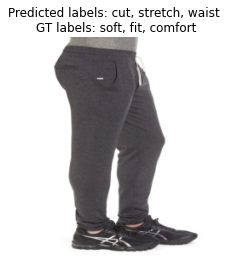

[0.0074865  0.02345989 0.05219856 0.10689794 0.07730801 0.00349708
 0.0299582  0.0078261  0.07024249 0.11323172 0.0027577  0.40231764
 0.00918998 0.00240505 0.00425539 0.00131489 0.12238189 0.04495679
 0.01061598 0.01422021 0.32519642 0.02566222 0.01163241 0.00247016
 0.00530658 0.00201323 0.00148229 0.05902905 0.01109799 0.10458136
 0.0063066  0.08418134 0.0011718  0.00120088 0.01326497 0.03935992
 0.01914865 0.10523704 0.00440686 0.05437998 0.02045304 0.03818712
 0.01587314 0.0014221  0.006473   0.01113503 0.00758653 0.11334729
 0.01480275 0.01559304]


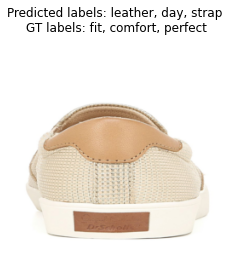

[0.11702904 0.09282925 0.10459941 0.07733981 0.10789893 0.13022898
 0.06492063 0.06154234 0.04553768 0.02051888 0.03634326 0.03621196
 0.04764624 0.04839563 0.09236753 0.04569416 0.02206645 0.0396288
 0.03709934 0.03481947 0.05302429 0.04934422 0.03147473 0.05130673
 0.04499836 0.07467521 0.02455267 0.03267273 0.01775601 0.00635367
 0.03813097 0.02214873 0.08177549 0.01841517 0.02254396 0.02196949
 0.01843272 0.02474026 0.02039179 0.05620925 0.03416151 0.05122266
 0.05120375 0.03302092 0.03533913 0.02977389 0.06826779 0.00704875
 0.02879959 0.06205961]


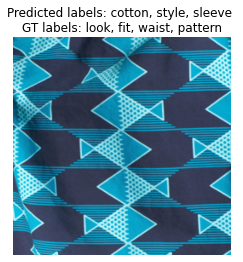

[0.1044542  0.12024961 0.091944   0.0819384  0.1060734  0.10463568
 0.08425177 0.1249589  0.05472185 0.03426519 0.02995797 0.04267462
 0.06507128 0.1435267  0.13193907 0.05141707 0.03695117 0.06982623
 0.05032227 0.03039489 0.06915791 0.10731314 0.03180087 0.04226366
 0.03411272 0.08979351 0.07021498 0.02759886 0.02980853 0.01689773
 0.03393777 0.02609895 0.11222689 0.04317546 0.03687086 0.02099049
 0.02359944 0.03186553 0.01924741 0.06983774 0.06840408 0.07873502
 0.05444976 0.03484546 0.02876005 0.02614254 0.0740778  0.01596363
 0.03349185 0.06180577]


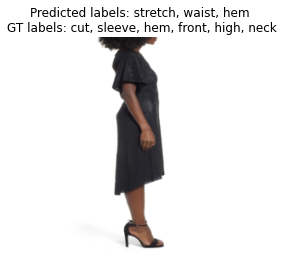

[0.06525398 0.24627629 0.11369861 0.10800217 0.11375255 0.01582714
 0.18509918 0.32257134 0.11318928 0.08565582 0.00253042 0.03042995
 0.04302255 0.2317702  0.10417363 0.03107029 0.05493141 0.09090381
 0.09982361 0.0081135  0.01020118 0.2364968  0.02456526 0.01292768
 0.00748132 0.01406092 0.15046625 0.01045608 0.10954246 0.00335859
 0.01413289 0.0138579  0.02697189 0.24331483 0.08338448 0.02341189
 0.02073403 0.01273673 0.00741645 0.02118047 0.02316924 0.06923264
 0.08215246 0.00508965 0.01573416 0.0059696  0.00859362 0.00393858
 0.01593423 0.0283387 ]


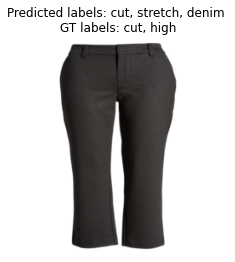

[0.06878179 0.08571599 0.08604571 0.11454532 0.11072127 0.07223011
 0.06472687 0.06533771 0.06410247 0.04414539 0.01365818 0.13791184
 0.04954606 0.06121003 0.07330324 0.03154463 0.04271859 0.07184653
 0.03971601 0.02950946 0.11759542 0.09532185 0.03711542 0.02702413
 0.0352401  0.05156559 0.03913438 0.05371583 0.02621494 0.02278435
 0.02814101 0.03594021 0.05837083 0.0274156  0.02873521 0.03167843
 0.02715179 0.04707489 0.01594696 0.07233071 0.05049785 0.0802885
 0.07031317 0.01730871 0.02427618 0.02287816 0.04203242 0.02568425
 0.03131301 0.04595251]


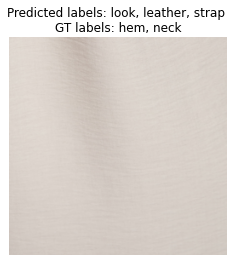

[0.12685385 0.1638204  0.13608123 0.1288765  0.10837568 0.09692363
 0.08342654 0.11359125 0.08690213 0.04296784 0.00729795 0.04104188
 0.06764674 0.0797338  0.10116059 0.07542811 0.03919594 0.09792101
 0.04492687 0.03577222 0.02429416 0.10431857 0.0541221  0.0512035
 0.03409506 0.05456432 0.04713495 0.03816157 0.03913333 0.00438676
 0.03895731 0.02323504 0.0794054  0.07032342 0.05818503 0.03018691
 0.02502938 0.02813244 0.02449348 0.04108267 0.02791312 0.08177629
 0.0740606  0.02074412 0.03015072 0.01872967 0.02040927 0.00639725
 0.02936414 0.07098282]


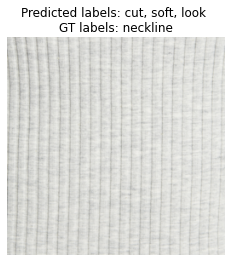

[0.04937787 0.06442357 0.071325   0.10783193 0.10275544 0.05291155
 0.05615027 0.0481411  0.05943101 0.04755849 0.01259348 0.17983986
 0.04083758 0.04524017 0.05258205 0.02005674 0.0454537  0.06472623
 0.03288229 0.02557626 0.16665338 0.08434571 0.02960976 0.01848877
 0.02821397 0.03728906 0.02759336 0.0540387  0.02142087 0.03489997
 0.02212213 0.03914165 0.03908216 0.01690854 0.0228497  0.02990683
 0.02568443 0.05231002 0.01256923 0.07699019 0.05179305 0.07230488
 0.0586069  0.01279364 0.01905504 0.02128479 0.03988937 0.03748967
 0.02794413 0.03698638]


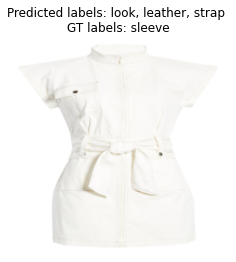

[0.13569984 0.11616756 0.1195359  0.08120932 0.10701688 0.12943411
 0.07603101 0.08445837 0.04966819 0.02130842 0.04319769 0.0251177
 0.05392505 0.06565356 0.10213822 0.05834862 0.02520913 0.04618245
 0.04125529 0.03969397 0.04025946 0.05346591 0.03334759 0.06448258
 0.04657271 0.08332969 0.03015714 0.02943619 0.02125295 0.00557628
 0.0440943  0.02374573 0.09715458 0.02520429 0.02859415 0.02223319
 0.01899987 0.02367818 0.02402817 0.0543612  0.03666888 0.05772027
 0.04907774 0.04303646 0.04133452 0.03220978 0.07232286 0.00612965
 0.0304451  0.07795662]


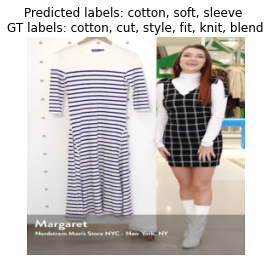

[0.2934197  0.13543926 0.17266831 0.13232927 0.1403993  0.24666746
 0.08244653 0.03281149 0.11532278 0.04307029 0.01078935 0.03554558
 0.08217151 0.01824718 0.07654056 0.1048143  0.04220111 0.0694689
 0.03407895 0.07379512 0.01525039 0.04065294 0.06187742 0.10100292
 0.06473251 0.06284624 0.00575007 0.05914002 0.02575981 0.00241559
 0.05337678 0.02251292 0.04593406 0.01202036 0.0775579  0.04322071
 0.03634047 0.0328663  0.05596166 0.03991276 0.01513216 0.0416323
 0.08449436 0.02937996 0.04487921 0.03428551 0.02078094 0.00431134
 0.04754787 0.08417717]


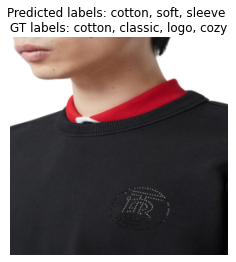

[0.10021822 0.10986297 0.11129376 0.08432979 0.10838814 0.09724745
 0.07605105 0.09204617 0.05092167 0.02669258 0.03356108 0.04559111
 0.04907088 0.07118275 0.1005267  0.0451444  0.02748951 0.05005394
 0.04465228 0.03185322 0.06380039 0.07091913 0.03362498 0.0446654
 0.04040129 0.07122717 0.04452069 0.03383714 0.02397352 0.00913606
 0.03865006 0.02689562 0.08542877 0.03225061 0.02636388 0.02493698
 0.02001432 0.02815853 0.01905977 0.05978959 0.04426141 0.06435996
 0.05697513 0.03040663 0.03638772 0.0286246  0.06718717 0.0099674
 0.02935726 0.06298562]


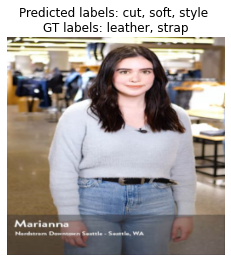

[0.10922609 0.10497205 0.11047319 0.07761416 0.10426608 0.1091747
 0.07269583 0.08529304 0.04563392 0.0218618  0.0451097  0.03512809
 0.04775348 0.06754605 0.10023516 0.04630332 0.02431989 0.04341015
 0.04246065 0.03341293 0.05939354 0.0588586  0.03079649 0.05047726
 0.04308846 0.07858586 0.03740323 0.0310873  0.0206951  0.00788685
 0.04028792 0.0255801  0.09171271 0.02585748 0.02359682 0.02239307
 0.01822177 0.02568799 0.01971955 0.05967103 0.0424807  0.05946979
 0.0503158  0.03667552 0.03818516 0.03107427 0.08008569 0.00839437
 0.02901427 0.06720615]


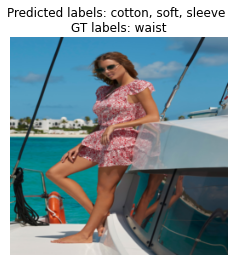

[0.08336794 0.10161448 0.10557128 0.10683623 0.11778471 0.08826134
 0.06675178 0.06856368 0.06664628 0.03923745 0.01084167 0.09717031
 0.051137   0.05092295 0.08319703 0.0410096  0.03396825 0.06877826
 0.04070261 0.03042964 0.0690274  0.08775111 0.04394023 0.03379522
 0.03696932 0.05284381 0.03734269 0.04893826 0.02719469 0.01026014
 0.03148231 0.02698898 0.06216977 0.03376994 0.03068896 0.03175562
 0.02495725 0.03628562 0.01770901 0.05640673 0.03662281 0.06993649
 0.07853273 0.01655739 0.02779062 0.02188937 0.03334023 0.01330247
 0.03023041 0.04945122]


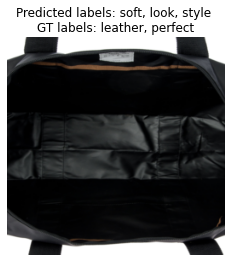

[0.01343606 0.0388526  0.05896256 0.08333524 0.10027213 0.00950934
 0.03796626 0.01899799 0.06100108 0.09832606 0.00726639 0.2511843
 0.01821087 0.01171523 0.01373368 0.00432221 0.09149392 0.05459198
 0.01591024 0.01835809 0.34775013 0.05934262 0.01777751 0.00564577
 0.00758039 0.0078863  0.00679528 0.04214175 0.01444976 0.16527024
 0.01065703 0.06709792 0.00550344 0.00363847 0.01923276 0.03698854
 0.02098905 0.1002368  0.00749393 0.07533941 0.04693159 0.04509015
 0.01931768 0.00435619 0.01033292 0.01680355 0.02018069 0.1345226
 0.02239054 0.02527525]


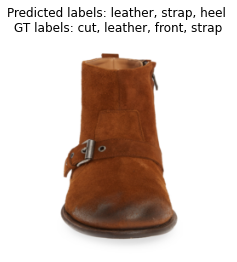

[3.31279426e-03 1.58968326e-02 4.09276932e-02 7.59219229e-02
 6.61801696e-02 1.41827215e-03 2.17053518e-02 4.54249885e-03
 5.51904589e-02 1.23811536e-01 2.13440461e-03 3.62150490e-01
 5.45437075e-03 1.34819397e-03 2.07855785e-03 5.34155930e-04
 1.43147156e-01 3.52922752e-02 6.34219078e-03 9.51016229e-03
 4.35030520e-01 2.08270196e-02 6.74566021e-03 1.16215250e-03
 2.24375934e-03 9.43450665e-04 6.92838745e-04 3.83436568e-02
 6.71150070e-03 2.00944424e-01 3.53731960e-03 8.24766308e-02
 4.52678825e-04 4.31653927e-04 9.57595557e-03 3.16919088e-02
 1.35431709e-02 1.16053693e-01 2.68744095e-03 5.15042730e-02
 2.02424787e-02 2.52018049e-02 6.91362983e-03 8.03160481e-04
 3.77101824e-03 8.81232042e-03 5.80113800e-03 1.88088879e-01
 1.11961868e-02 1.15648527e-02]


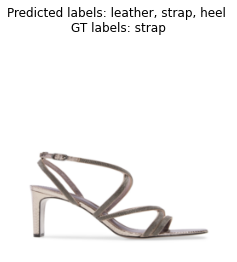

[0.07411331 0.24007942 0.13498762 0.11421362 0.13130039 0.0223581
 0.16610348 0.26165774 0.11462571 0.09071854 0.00321459 0.04044195
 0.04922069 0.16475606 0.10204892 0.03875865 0.05690873 0.09820271
 0.08106522 0.01266514 0.01518799 0.21972644 0.03431621 0.01797496
 0.01056683 0.01832028 0.12022866 0.0154268  0.09560656 0.00500265
 0.02024895 0.01830703 0.03207605 0.19930172 0.08581731 0.03186451
 0.0245006  0.01933559 0.0112694  0.02585819 0.02605643 0.07149809
 0.08329633 0.00675758 0.02112339 0.00865208 0.01042805 0.00567073
 0.02082922 0.03722   ]


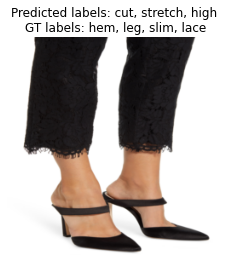

[0.03303015 0.08522826 0.09029752 0.11097412 0.1281915  0.01968503
 0.07389981 0.0587456  0.08923044 0.11864603 0.00905107 0.19474983
 0.03721898 0.03952169 0.0363507  0.01416345 0.09347972 0.08641943
 0.03362358 0.02561568 0.19001912 0.11516048 0.03118222 0.01276408
 0.01374589 0.01716661 0.02585709 0.04530355 0.03537194 0.08815173
 0.0201668  0.06218465 0.01600401 0.02001887 0.04171399 0.04770736
 0.03168147 0.08463123 0.01385632 0.07239723 0.0567316  0.0704767
 0.04227507 0.00848925 0.01912519 0.020823   0.02485386 0.07606658
 0.03152753 0.03880107]


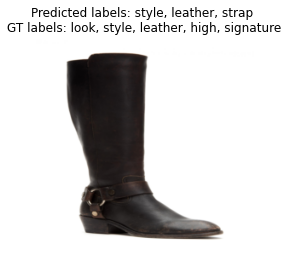

[0.07751522 0.08930486 0.08470073 0.08915856 0.10766744 0.0957607
 0.06227792 0.07152291 0.05388125 0.0341695  0.01734641 0.08644398
 0.05294091 0.07269363 0.09310609 0.03810582 0.03231223 0.06214883
 0.03872699 0.02898004 0.09955078 0.09296745 0.0359082  0.03197394
 0.03487015 0.06837926 0.04387227 0.04055052 0.02290254 0.0182796
 0.02920133 0.02729828 0.07944031 0.02806541 0.02634355 0.02474728
 0.02351835 0.03763881 0.01621965 0.07016166 0.05349702 0.06962187
 0.06265759 0.02155482 0.02498609 0.02372036 0.05188634 0.01939483
 0.03063532 0.04858807]


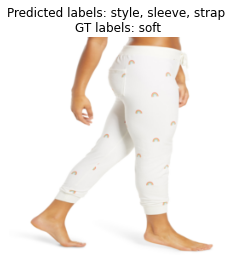

[0.13098596 0.17368922 0.13865362 0.13228579 0.10588913 0.09031611
 0.08872421 0.12161084 0.09262947 0.04602554 0.00621493 0.03678773
 0.06888673 0.08213035 0.09997397 0.08004282 0.04084498 0.10280457
 0.04506145 0.03526265 0.02017549 0.10703178 0.05499914 0.0512727
 0.03154902 0.04898321 0.04774972 0.03617834 0.04211551 0.00368653
 0.03923336 0.022577   0.07499902 0.08116666 0.06476281 0.03051638
 0.02480993 0.0264328  0.02529547 0.03798049 0.02506414 0.08252872
 0.07387599 0.01942678 0.02961385 0.01754011 0.01722986 0.00561328
 0.02795828 0.07160524]


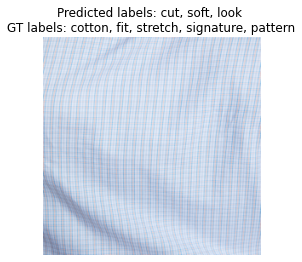

[0.08474754 0.04050801 0.07774091 0.01267747 0.03479895 0.05155457
 0.04890329 0.0554925  0.00476259 0.00172592 0.65603846 0.00091585
 0.01178296 0.0300063  0.03379693 0.01515373 0.00460465 0.00406273
 0.01554603 0.01408548 0.02319099 0.00363716 0.00243551 0.05086624
 0.02347789 0.06054228 0.00411959 0.00360863 0.00248166 0.00109374
 0.02755244 0.00935712 0.05882929 0.00101959 0.00234725 0.00353496
 0.00201465 0.00371221 0.00722672 0.02846273 0.02080754 0.01553012
 0.00443754 0.11624794 0.03242929 0.03477599 0.42774725 0.00084579
 0.00830089 0.08870626]


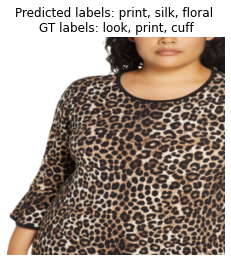

In [136]:
# Run inference on the test data
model.eval()
for sample_id in range(50):
    test_img, test_labels = dataset_val[sample_id]
#     test_img_path = os.path.join(img_folder, dataset_val.imgs[sample_id])
    with torch.no_grad():
#         raw_pred = model(test_img.unsqueeze(0)).cpu().numpy()[0]
        x_in = test_img.to(device=device, dtype=torch.float)
        raw_pred = model(x_in.unsqueeze(0)).cpu().numpy()[0]
        maxval=sorted(raw_pred,reverse=True)
        print(raw_pred)
        y1 = np.zeros([len(raw_pred)])
        for att in range(len(raw_pred)):
            if raw_pred[att] in maxval[:3]:
                y1[att]=1
        #raw_pred = np.array(raw_pred >0.12 , dtype=float)
        raw_pred=y1

    predicted_labels = np.array(dataset_val.classes)[np.argwhere(raw_pred > 0)[:, 0]]
    if not len(predicted_labels):
        predicted_labels = ['no predictions']
    img_labels = np.array(dataset_val.classes)[np.argwhere(test_labels > 0)[:, 0]]
    test_img_trans = np.transpose(test_img, (1, 2, 0)) 
    plt.imshow(test_img_trans)
    plt.title("Predicted labels: {} \nGT labels: {}".format(', '.join(predicted_labels), ', '.join(img_labels)))
    plt.axis('off')
    plt.show()

In [32]:
model = Resnext50(len(dataset_train.classes))
checkpointload = torch.load(save_path+"checkpoint-"+'000001'+".pth")

In [33]:
#check checkpoint performance
import timeit

start = timeit.default_timer()

epoch=1
model.eval()
test_batch_loss_value=[]
with torch.no_grad():
    model_result = []
    targets = []
    for imgs, batch_targets in test_dataloader:
        imgs, batch_targets = imgs.to(device=device, dtype=torch.float), batch_targets.to(device)
        model_batch_result = model(imgs)
        loss = criterion(model_batch_result, batch_targets.type(torch.float))
        test_batch_loss_value = loss.item()
        model_result.extend(model_batch_result.cpu().numpy())
        targets.extend(batch_targets.cpu().numpy())
testloss_mean=np.mean(test_batch_loss_value)

result = calculate_metrics(np.array(model_result), np.array(targets))
print("epoch:{:2d}  test: "
      "micro f1: {:.3f} "
      "macro f1: {:.3f} "
      "samples f1: {:.3f}".format(epoch, 
                                  result['micro/f1'],
                                  result['macro/f1'],
                                  result['samples/f1']))
stop = timeit.default_timer()

print('Time: ', stop - start)  

epoch: 1  test: micro f1: 0.101 macro f1: 0.069 samples f1: 0.098
Time:  622.454595878


epoch: 4  test: micro f1: 0.019 macro f1: 0.011 samples f1: 0.011


/home/zhu690/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhu690/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
